---

_You are currently looking at **version 0.1** of this notebook. To download notebooks and datafiles, as well as get help on Jupyter notebooks in the Coursera platform, visit the Jupyter Notebook FAQ course resource._

---

In [48]:
import numpy as np
import pandas as pd

In [49]:
import matplotlib.pyplot as plt

### Question 1
Import the data from `assets/fraud_data.csv`. What percentage of the observations in the dataset are instances of fraud?

*This function should return a float between 0 and 1.* 

In [15]:
def answer_one():
    df = pd.read_csv('assets/fraud_data.csv')
    test = []
    x=0
    y=0
    for item in df['Class']:
        if item not in test:
            test.append(item)
        if item > 0:
            x += 1
        y += 1
    pct = x/y
    return(pct)
    raise NotImplementedError()


In [16]:
answer_one()

0.016410823768035772

In [17]:
# Use X_train, X_test, y_train, y_test for all of the following questions
from sklearn.model_selection import train_test_split

df = pd.read_csv('assets/fraud_data.csv')

X = df.iloc[:,:-1]
y = df.iloc[:,-1]

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

### Question 2

Using `X_train`, `X_test`, `y_train`, and `y_test` (as defined above), train a dummy classifier that classifies everything as the majority class of the training data. What is the accuracy of this classifier? What is the recall?

*This function should a return a tuple with two floats, i.e. `(accuracy score, recall score)`.*

In [30]:
def answer_two():
    from sklearn.dummy import DummyClassifier
    from sklearn.metrics import accuracy_score, recall_score, confusion_matrix
    
    dummy_majority = DummyClassifier(strategy = 'most_frequent').fit(X_train, y_train)
    predicted = dummy_majority.predict(X_test)
    acc = accuracy_score(y_test, predicted)
    recall = recall_score(y_test, predicted)
    confusion = confusion_matrix(y_test, predicted)
    #return(confusion)
    return(acc, recall)

    
    raise NotImplementedError()

In [31]:
answer_two()

(0.9852507374631269, 0.0)

### Question 3

Using X_train, X_test, y_train, y_test (as defined above), train a SVC classifer using the default parameters. What is the accuracy, recall, and precision of this classifier?

*This function should a return a tuple with three floats, i.e. `(accuracy score, recall score, precision score)`.*

In [34]:
def answer_three():
    from sklearn.metrics import accuracy_score, recall_score, precision_score
    from sklearn.svm import SVC
    svm = SVC().fit(X_train, y_train)
    predicted= svm.predict(X_test)
    acc = accuracy_score(y_test, predicted)
    recall = recall_score(y_test, predicted)
    prec = precision_score(y_test, predicted)
    return(acc, recall, prec)
    # YOUR CODE HERE
    raise NotImplementedError()

In [35]:
answer_three()

(0.9900442477876106, 0.35, 0.9333333333333333)

### Question 4

Using the SVC classifier with parameters `{'C': 1e9, 'gamma': 1e-07}`, what is the confusion matrix when using a threshold of -220 on the decision function. Use X_test and y_test.

*This function should return a confusion matrix, a 2x2 numpy array with 4 integers.*

In [39]:
def answer_four():
    from sklearn.metrics import confusion_matrix
    from sklearn.svm import SVC
    
    svm = SVC(C=1e9, gamma = 1e-07).fit(X_train, y_train)
    dec_func= svm.decision_function(X_test)
    dec_thresh = -220
    predicted = []
    #acc = accuracy_score(y_test, predicted)
    #recall = recall_score(y_test, predicted)
    
    for i in dec_func:
        if i< dec_thresh:
            predicted.append(0)
        else:
            predicted.append(1)
            
    conf = confusion_matrix(y_test, predicted)
    return(conf)
    
    # YOUR CODE HERE
    raise NotImplementedError()

In [ ]:
answer_four()

array([[5320,   24],
       [  14,   66]])

### Question 5

Train a logisitic regression classifier with default parameters using X_train and y_train.

For the logisitic regression classifier, create a precision recall curve and a roc curve using y_test and the probability estimates for X_test (probability it is fraud).

Looking at the precision recall curve, what is the recall when the precision is `0.75`?

Looking at the roc curve, what is the true positive rate when the false positive rate is `0.16`?

*This function should return a tuple with two floats, i.e. `(recall, true positive rate)`.*

In [79]:
def answer_five():
    from sklearn.linear_model import LogisticRegression
    from sklearn.metrics import precision_recall_curve
    from sklearn.metrics import roc_curve
    %matplotlib inline
    lr = LogisticRegression().fit(X_train, y_train)
    y_scores_lr = lr.fit(X_train, y_train).decision_function(X_test)
    
    precision, recall, threshold = precision_recall_curve(y_test, y_scores_lr)
    fpr_lr, tpr_lr, _ = roc_curve(y_test, y_scores_lr)
    
    r=np.interp(0.75, precision, recall)
    tpr =np.interp(0.61, fpr_lr, tpr_lr)
    return(r, tpr)
    raise NotImplementedError()

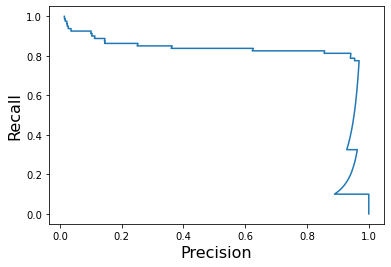

0.825 0.9625


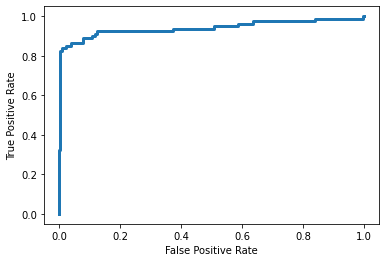

In [80]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import roc_curve
%matplotlib inline
lr = LogisticRegression().fit(X_train, y_train)
y_scores_lr = lr.fit(X_train, y_train).decision_function(X_test)

precision, recall, threshold = precision_recall_curve(y_test, y_scores_lr)
plt.figure
plt.plot(precision, recall, label='Precision-Recall Curve')
plt.xlabel('Precision', fontsize=16)
plt.ylabel('Recall', fontsize=16)
#plt.axes().set_aspect('equal')
plt.ginput(4)
plt.show()

r=np.interp(0.75, precision, recall)

y_score_lr = lr.fit(X_train, y_train).decision_function(X_test)
fpr_lr, tpr_lr, _ = roc_curve(y_test, y_score_lr)

plt.plot(fpr_lr, tpr_lr, lw=3, label = 'LogRegr ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

tpr =np.interp(0.61, fpr_lr, tpr_lr)

print(r, tpr)

### Question 6

Perform a grid search over the parameters listed below for a Logisitic Regression classifier, using recall for scoring and the default 3-fold cross validation. (Suggest to use `solver='liblinear'`, more explanation [here](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html))

`'penalty': ['l1', 'l2']`

`'C':[0.01, 0.1, 1, 10]`

From `.cv_results_`, create an array of the mean test scores of each parameter combination. i.e.

|      	| `l1` 	| `l2` 	|
|:----:	|----	|----	|
| **`0.01`** 	|    ?	|   ? 	|
| **`0.1`**  	|    ?	|   ? 	|
| **`1`**    	|    ?	|   ? 	|
| **`10`**   	|    ?	|   ? 	|

<br>

*This function should return a 4 by 2 numpy array with 8 floats.* 

*Note: do not return a DataFrame, just the values denoted by `?` in a numpy array.*

In [98]:
def answer_six():    
    from sklearn.model_selection import GridSearchCV
    from sklearn.linear_model import LogisticRegression
    lr = LogisticRegression(solver = 'liblinear').fit(X_train, y_train)
    grid_values = {'penalty': ['l1', 'l2'], 'C':[0.01, 0.1, 1, 10]}
    
    grid = GridSearchCV(lr, grid_values)
    grid.fit(X_train, y_train)
    dic= grid.cv_results_
    test_score = dic['mean_test_score']
    #print(test_score)
    temp = []
    l2a = []
    l = 0
    for item in test_score:
        if l < 2:
            temp.append(item)
            l += 1
        else:
            l2a.append(temp)
            l = 1
            temp = [item]
    l2a.append(temp)
    result = np.array(l2a)
    
    return(result)
    

    # YOUR CODE HERE
    raise NotImplementedError()

In [97]:
answer_six()

[0.9947138  0.9955743  0.996189   0.99637337 0.99588165 0.99606604
 0.99575869 0.99575869]


array([[0.9947138 , 0.9955743 ],
       [0.996189  , 0.99637337],
       [0.99588165, 0.99606604],
       [0.99575869, 0.99575869]])

In [ ]:
# Use the following function to help visualize results from the grid search
def GridSearch_Heatmap(scores):
    %matplotlib notebook
    import seaborn as sns
    import matplotlib.pyplot as plt
    plt.figure()
    sns.heatmap(scores.reshape(5,2), xticklabels=['l1','l2'], yticklabels=[0.01, 0.1, 1, 10])
    plt.yticks(rotation=0);

#GridSearch_Heatmap(answer_six())